In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import ast, json
from scipy import stats
from math import sqrt
from scipy.stats import t

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
pd.read_csv("teaching_training_data.csv")
pd.read_csv("teaching_training_data_cft.csv")
pd.read_csv("teaching_training_data_com.csv")
pd.read_csv("teaching_training_data_grit.csv")
pd.read_csv("teaching_training_data_num.csv")
pd.read_csv("teaching_training_data_opt.csv")

,Unnamed: 0,unid,opt_score
0,1,41964,NaN
1,2,41964,NaN
2,3,15241,7.0
3,4,33702,3.0
4,5,33702,-5.0
...,...,...,...
83265,83266,34341,3.0
83266,83267,94118,4.0
83267,83268,79971,-4.0
83268,83269,79971,3.0


In [54]:
data = pd.read_csv("teaching_training_data.csv")
cft = pd.read_csv("teaching_training_data_cft.csv", usecols=["unid", "cft_score"])
com = pd.read_csv("teaching_training_data_com.csv", usecols=["unid", "com_score"])
grit = pd.read_csv("teaching_training_data_grit.csv", usecols=["unid", "grit_score"])
num = pd.read_csv("teaching_training_data_num.csv", usecols=["unid", "num_score"])
opt = pd.read_csv("teaching_training_data_opt.csv", usecols=["unid", "opt_score"])
data.head()

,Unnamed: 0,unid,survey_date_month,survey_num,gender,dob,province,working,job_start_date,job_leave_date,...,leadershiprole,peoplelive,peoplelive_15plus,numchildren,numearnincome,anygrant,anyhhincome,financial_situation_now,financial_situation_5years,givemoney_yes
0,1,41964,2018-06-01,1,Female,1992-02-01,NaN,True,2018-06-01,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN
1,2,41964,2018-11-01,2,Female,1992-02-01,NaN,True,2018-04-30,2018-11-08,...,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN
2,3,15241,2016-03-01,1,Female,1988-11-01,NaN,True,2015-03-01,2016-03-15,...,No,2,NaN,3,1,True,True,2,8,False
3,4,33702,2016-04-01,1,Male,1991-04-01,NaN,True,2016-02-01,2016-04-14,...,No,4,NaN,1,1,False,True,1 (Worst possible financial situation),1 (Worst possible financial situation),False
4,5,33702,2016-08-01,2,Male,1991-04-01,NaN,False,NaN,NaN,...,No,4,NaN,1,1,False,True,1 (Worst possible financial situation),1 (Worst possible financial situation),False


In [7]:
data.dtypes

Unnamed: 0                     int64
unid                           int64
survey_date_month             object
survey_num                     int64
gender                        object
dob                           object
province                      object
working                         bool
job_start_date                object
job_leave_date                object
company_size                  object
monthly_pay                   object
volunteer                     object
leadershiprole                object
peoplelive                    object
peoplelive_15plus             object
numchildren                   object
numearnincome                 object
anygrant                      object
anyhhincome                   object
financial_situation_now       object
financial_situation_5years    object
givemoney_yes                 object
dtype: object

In [8]:
data.apply('nunique')

Unnamed: 0                    83270
unid                          51262
survey_date_month                34
survey_num                        9
gender                            2
dob                             274
province                          9
working                           2
job_start_date                  160
job_leave_date                  851
company_size                      2
monthly_pay                      11
volunteer                         2
leadershiprole                    2
peoplelive                       21
peoplelive_15plus                17
numchildren                       6
numearnincome                    16
anygrant                          2
anyhhincome                       2
financial_situation_now          10
financial_situation_5years       10
givemoney_yes                     2
dtype: int64

In [9]:
columns_to_drop = ["job_start_date","job_leave_date","leadershiprole","peoplelive"
                   ,"peoplelive_15plus","numchildren","anygrant","anyhhincome"
                   ,"financial_situation_5years"
                   ,"givemoney_yes","province","dob"]
data = data.drop(columns_to_drop, axis=1)
data.head()
#i didnt think that those rows were relevant to our question but if we want to keep some then cool.

,Unnamed: 0,unid,survey_date_month,survey_num,gender,working,company_size,monthly_pay,volunteer,numearnincome,financial_situation_now
0,1,41964,2018-06-01,1,Female,True,More than 200 employees,Between R2001 and 3000,NaN,NaN,NaN
1,2,41964,2018-11-01,2,Female,True,NaN,NaN,NaN,NaN,NaN
2,3,15241,2016-03-01,1,Female,True,NaN,NaN,No,1,2
3,4,33702,2016-04-01,1,Male,True,NaN,NaN,Yes,1,1 (Worst possible financial situation)
4,5,33702,2016-08-01,2,Male,False,NaN,NaN,Yes,1,1 (Worst possible financial situation)


In [10]:
data.head()

,Unnamed: 0,unid,survey_date_month,survey_num,gender,working,company_size,monthly_pay,volunteer,numearnincome,financial_situation_now
0,1,41964,2018-06-01,1,Female,True,More than 200 employees,Between R2001 and 3000,NaN,NaN,NaN
1,2,41964,2018-11-01,2,Female,True,NaN,NaN,NaN,NaN,NaN
2,3,15241,2016-03-01,1,Female,True,NaN,NaN,No,1,2
3,4,33702,2016-04-01,1,Male,True,NaN,NaN,Yes,1,1 (Worst possible financial situation)
4,5,33702,2016-08-01,2,Male,False,NaN,NaN,Yes,1,1 (Worst possible financial situation)


In [11]:
columns_2_drop = ["Unnamed: 0","company_size","monthly_pay","volunteer","numearnincome"]
data = data.drop(columns_2_drop, axis=1)
data.head()

,unid,survey_date_month,survey_num,gender,working,financial_situation_now
0,41964,2018-06-01,1,Female,True,NaN
1,41964,2018-11-01,2,Female,True,NaN
2,15241,2016-03-01,1,Female,True,2
3,33702,2016-04-01,1,Male,True,1 (Worst possible financial situation)
4,33702,2016-08-01,2,Male,False,1 (Worst possible financial situation)


In [12]:
data.shape

(83270, 6)

In [13]:
cft_max = cft.groupby('unid')['cft_score'].max().to_frame()
cft_max

,cft_score
unid,
130,4
147,6
156,3
157,7
158,4
...,...
102486,6
102503,6
102504,3


In [14]:
data.replace({"1 (Worst possible financial situation)": 1, "2": 2, "3": 3, "4": 4, "5": 5, "6": 6, "7": 7,
              "8": 8, "9": 9, "10 (Best possible financial situation)": 10, "nan": 0
             }, inplace=True)

In [15]:
data["financial_situation_now"] = data.financial_situation_now.astype(float)

In [16]:
df = pd.merge(data,cft, how = 'outer', on = 'unid')
df = pd.merge(df,num, how = 'outer', on = 'unid')
df = pd.merge(df,com, how = 'outer', on = 'unid')
df = pd.merge(df,grit, how = 'outer', on = 'unid')
df = pd.merge(df,opt, how = 'outer', on = 'unid')
df
#this way by doing 'outer' i have not dropped any rows but created multiple copies, later i get rid of the unneccesary ones.

,unid,survey_date_month,survey_num,gender,working,financial_situation_now,cft_score,num_score,com_score,grit_score,opt_score
0,41964,2018-06-01,1,Female,True,NaN,4.0,NaN,4.0,4,NaN
1,41964,2018-06-01,1,Female,True,NaN,4.0,NaN,4.0,4,NaN
2,41964,2018-06-01,1,Female,True,NaN,4.0,NaN,4.0,9,NaN
3,41964,2018-06-01,1,Female,True,NaN,4.0,NaN,4.0,9,NaN
4,41964,2018-06-01,1,Female,True,NaN,4.0,NaN,4.0,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...
27694471,79971,2017-08-01,3,Female,True,9.0,8.0,5.0,6.0,7,3.0
27694472,79971,2017-08-01,3,Female,True,9.0,8.0,5.0,6.0,7,3.0
27694473,79971,2017-08-01,3,Female,True,9.0,8.0,5.0,6.0,5,-4.0
27694474,79971,2017-08-01,3,Female,True,9.0,8.0,5.0,6.0,5,3.0


In [17]:
df.shape

(27694476, 11)

In [18]:
df.dtypes

unid                         int64
survey_date_month           object
survey_num                   int64
gender                      object
working                       bool
financial_situation_now    float64
cft_score                  float64
num_score                  float64
com_score                  float64
grit_score                   int64
opt_score                  float64
dtype: object

In [19]:
print(df.isnull().sum())

unid                             0
survey_date_month                0
survey_num                       0
gender                          30
working                          0
financial_situation_now    7058951
cft_score                    82043
num_score                  3789959
com_score                   690967
grit_score                       0
opt_score                  7058951
dtype: int64


In [20]:
print(df.shape)

# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]

print(duplicate_rows_df.shape)



(27694476, 11)
(27306693, 11)


In [21]:
df_new = df.groupby(df['unid']).aggregate({'gender':'first','working':'last'
                                          ,'num_score':'max','com_score':'max'
                                          ,'cft_score':'max','grit_score':'max'
                                          ,'opt_score':'max', 'financial_situation_now': 'last'})

In [22]:
 df_new.shape

(51262, 8)

In [23]:
df_new.head(15)

,gender,working,num_score,com_score,cft_score,grit_score,opt_score,financial_situation_now
unid,,,,,,,,
2,Female,False,NaN,NaN,NaN,6,NaN,NaN
3,Male,True,NaN,NaN,NaN,0,NaN,NaN
6,Female,False,NaN,NaN,NaN,7,NaN,NaN
7,Female,False,NaN,NaN,NaN,7,NaN,NaN
14,Female,True,NaN,NaN,NaN,7,3.0,3.0
17,Female,True,NaN,NaN,NaN,3,NaN,NaN
18,Male,False,NaN,NaN,NaN,0,NaN,NaN
25,Female,False,NaN,NaN,NaN,1,NaN,NaN
26,Female,False,NaN,NaN,NaN,6,NaN,NaN


In [24]:
df_new.shape #so we still have all the participants included as the total of unique participants in 51,262. 


(51262, 8)

In [25]:
df.apply('nunique')

unid                       51262
survey_date_month             34
survey_num                     9
gender                         2
working                        2
financial_situation_now       10
cft_score                     10
num_score                     10
com_score                     10
grit_score                    10
opt_score                     31
dtype: int64

In [26]:
df_new.describe()

,num_score,com_score,cft_score,grit_score,opt_score,financial_situation_now
count,11313.000000,19347.000000,32880.000000,51262.000000,30855.000000,30855.000000
mean,3.562008,5.561586,5.532360,5.276716,5.901864,2.537709
std,1.398839,1.419419,1.821947,2.834648,3.159596,1.726277
min,1.000000,1.000000,1.000000,0.000000,-12.000000,1.000000
25%,3.000000,5.000000,4.000000,3.000000,4.000000,1.000000
50%,3.000000,5.000000,6.000000,6.000000,6.000000,2.000000
75%,4.000000,6.000000,7.000000,8.000000,8.000000,3.000000
max,10.000000,10.000000,10.000000,9.000000,17.000000,10.000000


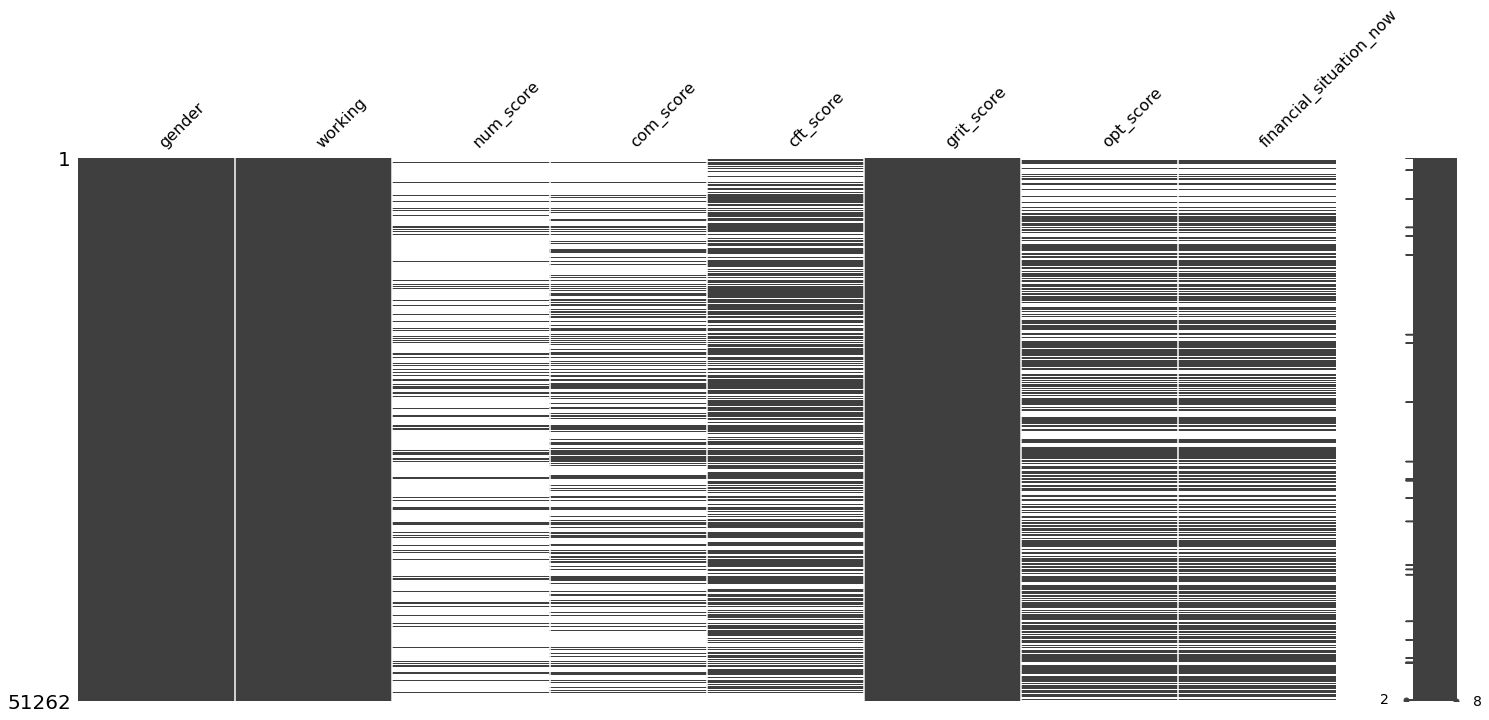

In [27]:
import missingno as msno

msno.matrix(df_new); #so as we can see, grit is the only thing that everyone seems to have done.

In [28]:
from ipywidgets import interact, fixed

In [29]:
def numerical_variable_distribution(df_new, col):
    df_new[col].plot.hist()

In [30]:
numerical_columns = df_new.select_dtypes(include=[np.number]).columns.tolist()
interact(numerical_variable_distribution, 
         col=numerical_columns, df_new=fixed(df_new));

interactive(children=(Dropdown(description='col', options=('num_score', 'com_score', 'cft_score', 'grit_score'…

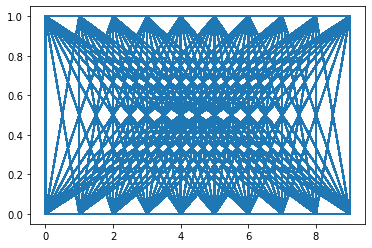

In [31]:
plt.plot('grit_score','working', data=df_new)
plt.show()
#obviously this shows us nothing....but it looks awesome. so i'm gonna leave it here 

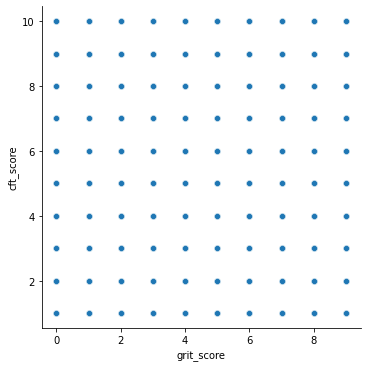

In [32]:
sns.relplot(x="grit_score", y="cft_score", data=df_new, kind="scatter")

In [33]:
df_new.dtypes

gender                      object
working                       bool
num_score                  float64
com_score                  float64
cft_score                  float64
grit_score                   int64
opt_score                  float64
financial_situation_now    float64
dtype: object

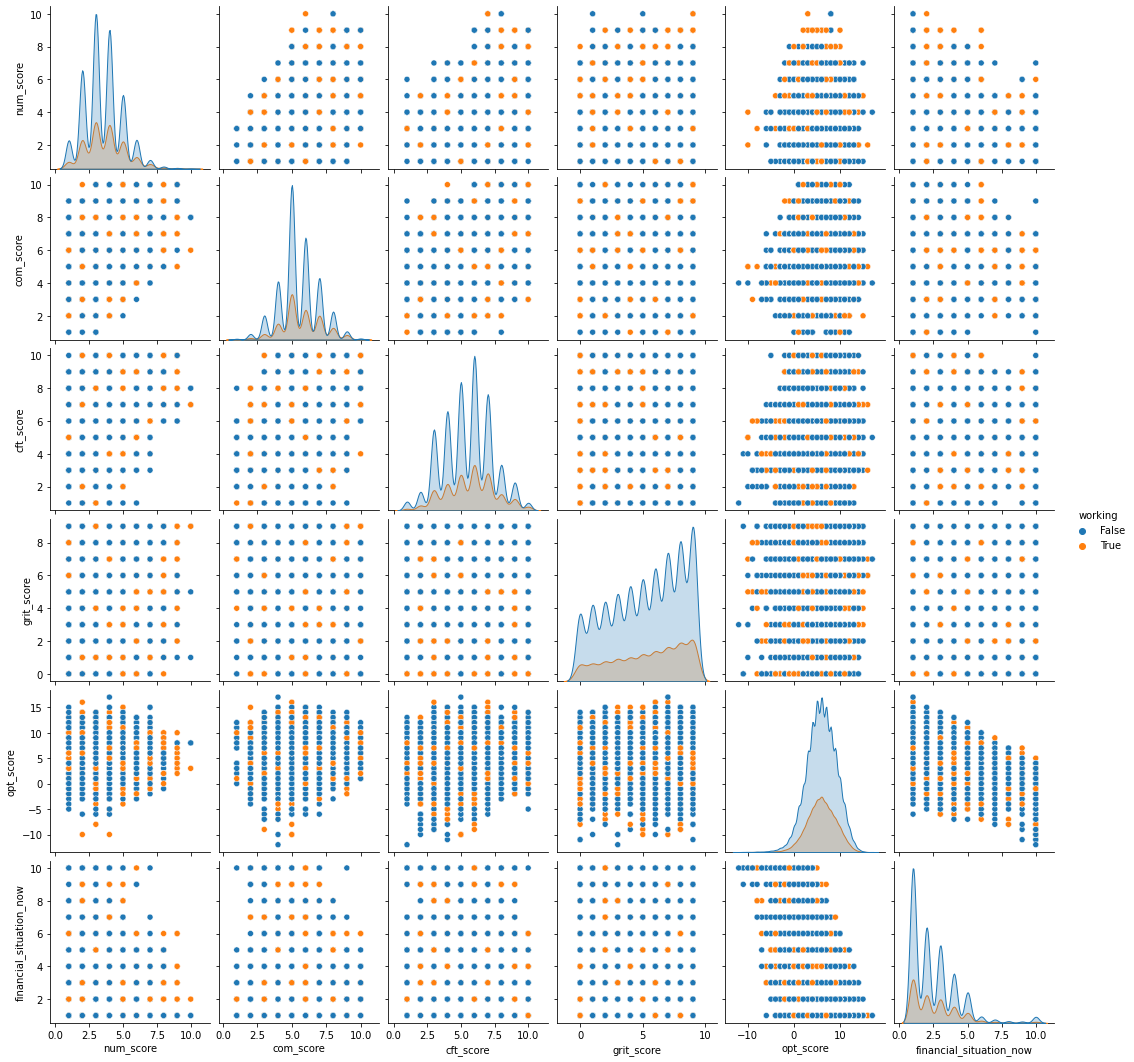

In [34]:
sns.pairplot(df_new, hue ='working')

/Users/rajulmehta/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


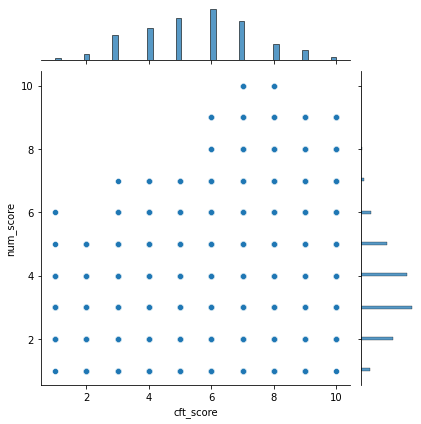

In [35]:
jp = sns.jointplot("cft_score", "num_score", data=df_new)

/Users/rajulmehta/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


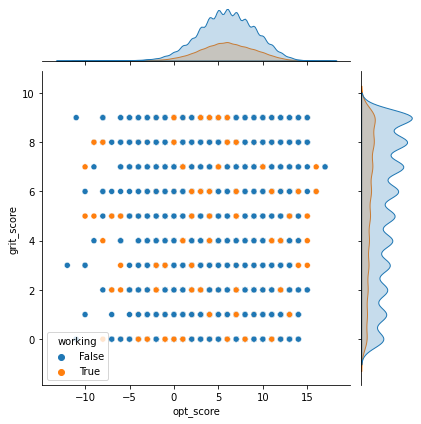

In [36]:
jp = sns.jointplot("opt_score", "grit_score", data=df_new, hue ='working')

In [37]:
ct_cft = pd.crosstab(df_new.cft_score, df_new.working)
print(ct_cft)

working    False  True 
cft_score              
1.0          309     71
2.0          652    214
3.0         2835    881
4.0         3474   1148
5.0         4490   1546
6.0         5407   1973
7.0         4067   1609
8.0         1598    702
9.0          980    496
10.0         267    161


In [38]:
ct_grit = pd.crosstab(df_new.grit_score, df_new.working)
print(ct_grit)

working     False  True 
grit_score              
0            2575    761
1            2882    762
2            2993    857
3            3289    971
4            3578   1023
5            3840   1164
6            4245   1293
7            4838   1470
8            5269   1657
9            5900   1895


In [39]:
ct_opt = pd.crosstab(df_new.opt_score, df_new.working)
print(ct_opt)

working    False  True 
opt_score              
-12.0          1      0
-11.0          3      0
-10.0          4      2
-9.0           3      2
-8.0           9      3
-7.0           9      2
-6.0          14      4
-5.0          26      4
-4.0          38     15
-3.0          79     18
-2.0         123     45
-1.0         258     73
 0.0         478    158
 1.0         842    262
 2.0        1212    425
 3.0        1854    647
 4.0        2393    844
 5.0        2812   1010
 6.0        2867   1088
 7.0        2685    931
 8.0        2300    797
 9.0        1912    651
 10.0       1358    485
 11.0        879    292
 12.0        448    152
 13.0        189     55
 14.0         54     17
 15.0         13      5
 16.0          1      2
 17.0          2      0


In [40]:
ct_gender = pd.crosstab(df_new.gender, df_new.working)
print(ct_gender)

working  False  True 
gender               
Female   26247   6721
Male     13142   5129


In [41]:
ct_com = pd.crosstab(df_new.com_score, df_new.working)
print(ct_com)

working    False  True 
com_score              
1.0           26      6
2.0          176     60
3.0          755    217
4.0         1824    625
5.0         4833   1784
6.0         3187   1164
7.0         1927    939
8.0          876    460
9.0          258    179
10.0          35     16


In [42]:
ct_num = pd.crosstab(df_new.num_score, df_new.working)
print(ct_num)

working    False  True 
num_score              
1.0          427    131
2.0         1478    547
3.0         2330    888
4.0         2085    835
5.0         1107    521
6.0          434    222
7.0          132     89
8.0           33     22
9.0           12     16
10.0           3      1


In [43]:
df_new.corr()

,working,num_score,com_score,cft_score,grit_score,opt_score,financial_situation_now
working,1.000000,0.064686,0.072402,0.058995,0.018201,0.003700,0.009954
num_score,0.064686,1.000000,0.332079,0.315806,0.019581,-0.015975,0.010906
com_score,0.072402,0.332079,1.000000,0.375450,0.002513,0.009281,0.002094
cft_score,0.058995,0.315806,0.375450,1.000000,0.008652,0.049584,-0.005663
grit_score,0.018201,0.019581,0.002513,0.008652,1.000000,0.083817,-0.007540
opt_score,0.003700,-0.015975,0.009281,0.049584,0.083817,1.000000,-0.438170
financial_situation_now,0.009954,0.010906,0.002094,-0.005663,-0.007540,-0.438170,1.000000


In [44]:
df_new.dtypes

gender                      object
working                       bool
num_score                  float64
com_score                  float64
cft_score                  float64
grit_score                   int64
opt_score                  float64
financial_situation_now    float64
dtype: object

In [45]:
df_new['gender']=df_new['gender'].replace(['Female','Male'],[1,0])
df_new['gender']

unid
2         1.0
3         0.0
6         1.0
7         1.0
14        1.0
         ... 
102518    0.0
102521    0.0
102522    1.0
102523    1.0
102524    1.0
Name: gender, Length: 51262, dtype: float64

In [65]:
df_new['gender']=df_new.astype(np.bool)

In [66]:
df_new.dtypes

gender                        bool
working                       bool
num_score                  float64
com_score                  float64
cft_score                  float64
grit_score                   int64
opt_score                  float64
financial_situation_now    float64
dtype: object

In [48]:
df_new.corr()

,gender,working,num_score,com_score,cft_score,grit_score,opt_score,financial_situation_now
gender,1.000000,-0.087362,-0.214569,-0.048191,-0.154293,-0.009385,0.026535,0.004162
working,-0.087362,1.000000,0.064686,0.072402,0.058995,0.018201,0.003700,0.009954
num_score,-0.214569,0.064686,1.000000,0.332079,0.315806,0.019581,-0.015975,0.010906
com_score,-0.048191,0.072402,0.332079,1.000000,0.375450,0.002513,0.009281,0.002094
cft_score,-0.154293,0.058995,0.315806,0.375450,1.000000,0.008652,0.049584,-0.005663
grit_score,-0.009385,0.018201,0.019581,0.002513,0.008652,1.000000,0.083817,-0.007540
opt_score,0.026535,0.003700,-0.015975,0.009281,0.049584,0.083817,1.000000,-0.438170
financial_situation_now,0.004162,0.009954,0.010906,0.002094,-0.005663,-0.007540,-0.438170,1.000000


In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
tstat, pvalue, ddof = ttest_ind(
                                grit_men,
                                grit_women,
                                alternative="two-sided",
                                usevar="pooled"
)
pvalue

NameError: name 'ttest_ind' is not defined

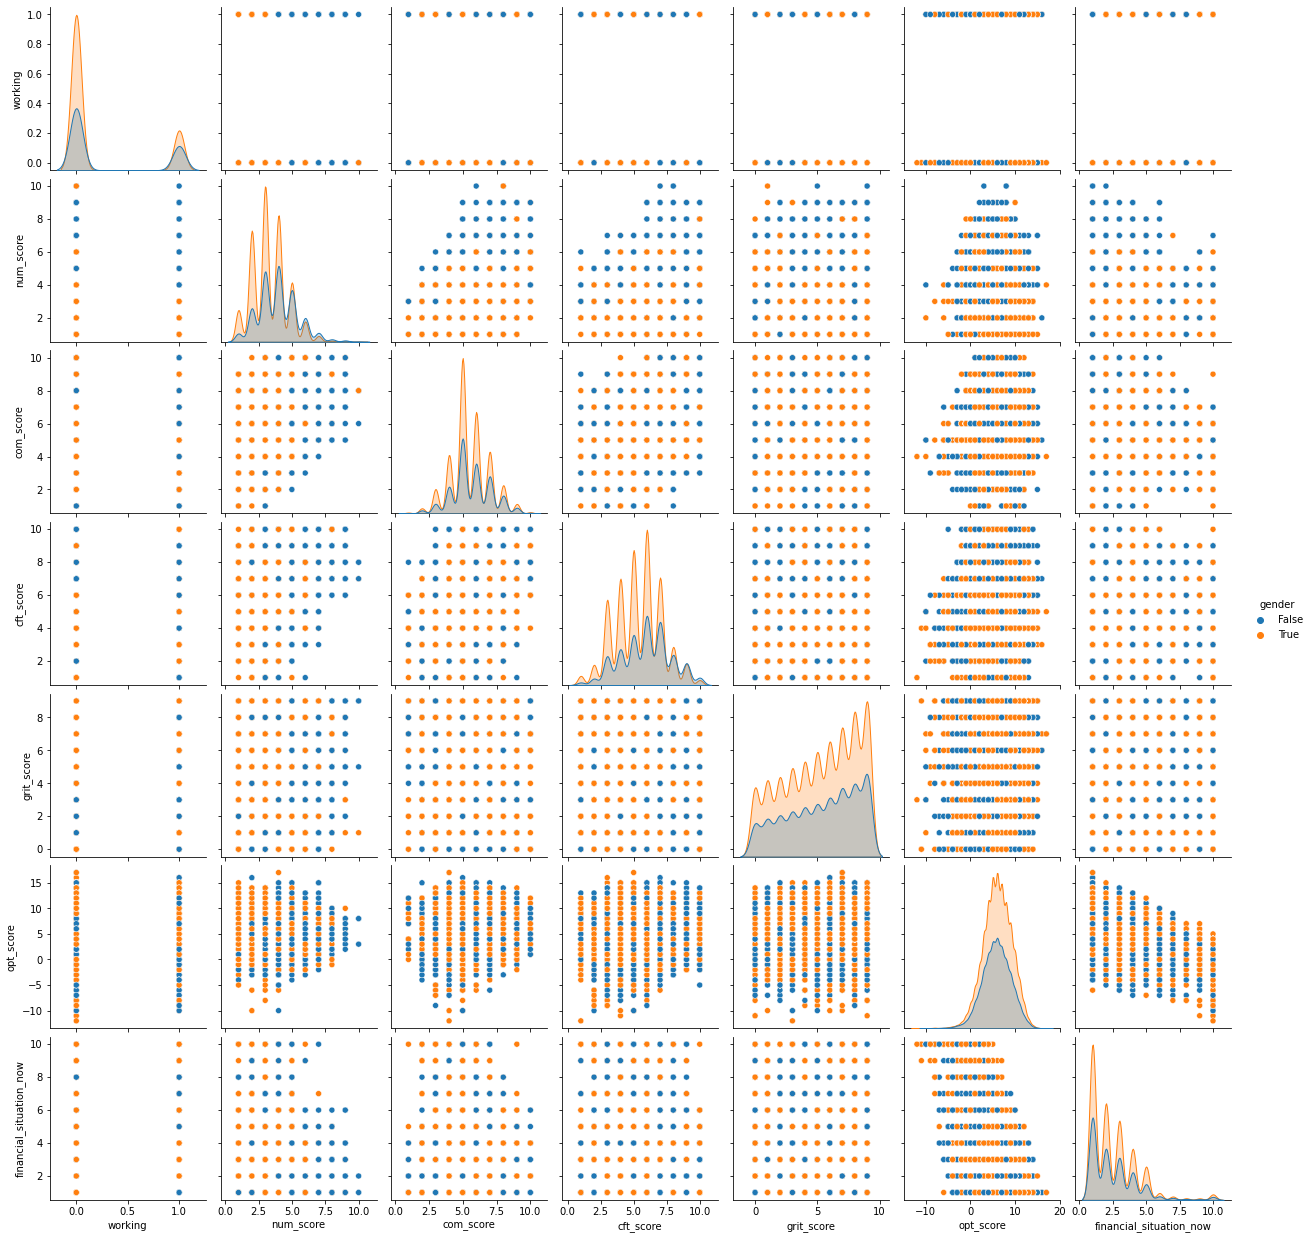

In [67]:

pp = sns.pairplot(df_new, hue="gender")

In [76]:
male = df_new.query('gender == "male"')['grit_score']
female = df_new.query('gender == "female"')['grit_score']

In [70]:
df_new.groupby('gender').describe()

num_score                                               com_score  \
           count      mean       std  min  25%  50%  75%   max     count   
gender                                                                     
False     4473.0  3.933154  1.454668  1.0  3.0  4.0  5.0  10.0    7074.0   
True      6840.0  3.319298  1.305317  1.0  2.0  3.0  4.0  10.0   12273.0   

                  ... opt_score       financial_situation_now            \
            mean  ...       75%   max                   count      mean   
gender            ...                                                     
False   5.651682  ...       8.0  17.0                 11389.0  2.528317   
True    5.509655  ...       8.0  17.0                 19466.0  2.543204   

                                            
             std  min  25%  50%  75%   max  
gender                                      
False   1.722547  1.0  1.0  2.0  3.0  10.0  
True    1.728475  1.0  1.0  2.0  3.0  10.0  

[2 rows x 48 columns]

In [71]:
male = stats.norm.rvs(loc=5, scale=3, size=100)
stats.shapiro(male) # shapiro test , grit 

ShapiroResult(statistic=0.9820298552513123, pvalue=0.1907278448343277)

In [72]:
female = stats.norm.rvs(loc=5, scale=3, size=100)
stats.shapiro(female)  # shapiro test , grit

ShapiroResult(statistic=0.992141842842102, pvalue=0.8314034938812256)

In [73]:
#levene test, grit
stats.levene(male, female)

LeveneResult(statistic=0.013219309094186017, pvalue=0.9085812490000181)

In [74]:
res = stats.ttest_ind(male, female, 
                      equal_var=True)

display(res) # Two - sample test - grit

Ttest_indResult(statistic=1.8676004322712636, pvalue=0.06329546506529543)

In [77]:
male1 = df_new.query('gender == "male"')['cft_score']
female1 = df_new.query('gender == "female"')['cft_score']

In [78]:
df_new.groupby('gender').describe()

num_score                                               com_score  \
           count      mean       std  min  25%  50%  75%   max     count   
gender                                                                     
False     4473.0  3.933154  1.454668  1.0  3.0  4.0  5.0  10.0    7074.0   
True      6840.0  3.319298  1.305317  1.0  2.0  3.0  4.0  10.0   12273.0   

                  ... opt_score       financial_situation_now            \
            mean  ...       75%   max                   count      mean   
gender            ...                                                     
False   5.651682  ...       8.0  17.0                 11389.0  2.528317   
True    5.509655  ...       8.0  17.0                 19466.0  2.543204   

                                            
             std  min  25%  50%  75%   max  
gender                                      
False   1.722547  1.0  1.0  2.0  3.0  10.0  
True    1.728475  1.0  1.0  2.0  3.0  10.0  

[2 rows x 48 columns]

In [79]:
male1 = stats.norm.rvs(loc=5, scale=3, size=100)
stats.shapiro(male1) # shapiro test, CFT

ShapiroResult(statistic=0.9811547994613647, pvalue=0.16337145864963531)

In [80]:
female1 = stats.norm.rvs(loc=5, scale=3, size=100)
stats.shapiro(female1)  # shapiro test , CFT

ShapiroResult(statistic=0.9845408797264099, pvalue=0.29414284229278564)

In [82]:
#levene test, CFT
stats.levene(male1, female1)

LeveneResult(statistic=0.8460380529534675, pvalue=0.3587948032083873)

In [83]:
res = stats.ttest_ind(male1, female1, 
                      equal_var=True)

display(res) #

Ttest_indResult(statistic=-1.607337897280577, pvalue=0.10957373642737549)